In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("/home/k8user/HateSpeech/labeled_data.csv")

In [4]:
df = df.drop('Unnamed: 0', axis=1)

In [5]:
df.head(3)

,count,hate_speech,offensive_language,neither,class,tweet
0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...


In [6]:
df.columns

Index(['count', 'hate_speech', 'offensive_language', 'neither', 'class',
       'tweet'],
      dtype='object')

In [7]:
df.describe()

,count,hate_speech,offensive_language,neither,class
count,24783.000000,24783.000000,24783.000000,24783.000000,24783.000000
mean,3.243473,0.280515,2.413711,0.549247,1.110277
std,0.883060,0.631851,1.399459,1.113299,0.462089
min,3.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,2.000000,0.000000,1.000000
50%,3.000000,0.000000,3.000000,0.000000,1.000000
75%,3.000000,0.000000,3.000000,0.000000,1.000000
max,9.000000,7.000000,9.000000,9.000000,2.000000


In [8]:
df.groupby("class").describe()

count                                              hate_speech  \
         count      mean       std  min  25%  50%  75%  max       count   
class                                                                     
0       1430.0  3.108392  0.648084  3.0  3.0  3.0  3.0  9.0      1430.0   
1      19190.0  3.268890  0.923024  3.0  3.0  3.0  3.0  9.0     19190.0   
2       4163.0  3.172712  0.746097  3.0  3.0  3.0  3.0  9.0      4163.0   

                 ... offensive_language       neither                      \
           mean  ...                75%  max    count      mean       std   
class            ...                                                        
0      2.256643  ...                1.0  4.0   1430.0  0.095804  0.326007   
1      0.180459  ...                3.0  9.0  19190.0  0.084888  0.284093   
2      0.062935  ...                1.0  4.0   4163.0  2.845544  0.795181   

                                
       min  25%  50%  75%  max  
class                           
0      0.0  0.0  0.0  0.0  4.0  
1      0.0  0.0  0.0  0.0  3.0  
2      2.0  2.0  3.0  3.0  9.0  

[3 rows x 32 columns]

In [9]:
#df.groupby("class").describe()["class"==0]
sum(df["class"]==0)

1430

In [10]:
df["class"].value_counts()

1    19190
2     4163
0     1430
Name: class, dtype: int64

In [11]:
def percentage_class(idx):
    Percentage = 100 * float(sum(df["class"]==idx))/float(len(df["class"]))
    return Percentage


In [12]:
print("the percenatge of '0' class", percentage_class(0))
print("the percenatge of '1' class", percentage_class(1))
print("the percenatge of '2' class", percentage_class(2))

the percenatge of '0' class 5.770084332001775
the percenatge of '1' class 77.43211072105879
the percenatge of '2' class 16.797804946939433


<AxesSubplot:ylabel='class'>

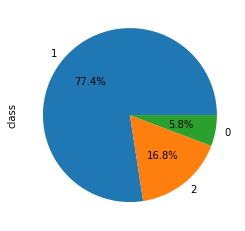

In [13]:
#ploting percentage of each class
df["class"].value_counts().plot(kind='pie',autopct='%1.1f%%')

Finding out the Maximum length tweet



In [14]:
df['length'] = df['tweet'].apply(len)
df.head()

,count,hate_speech,offensive_language,neither,class,tweet,length
0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...,140
1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,85
2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,120
3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,62
4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,137


<AxesSubplot:ylabel='Frequency'>

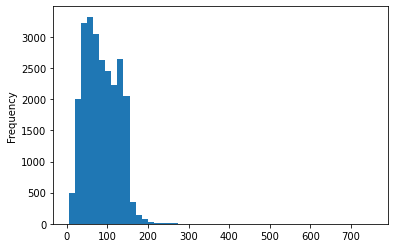

In [15]:
df['length'].plot(bins=50, kind='hist')

#Feature generation

Here copying the data from **df** to **dataF** and creating new variable with same data

In [16]:
#copying data from original variable to another varible.

dataF = df.copy()

In [17]:
#Viewing top 3 rows in the data set

dataF.head(3)

,count,hate_speech,offensive_language,neither,class,tweet,length
0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...,140
1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,85
2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,120


In [18]:
dataF.head(5)

,count,hate_speech,offensive_language,neither,class,tweet,length
0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...,140
1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,85
2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,120
3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,62
4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,137


In [19]:
# Cleaning the texts
import re
import nltk
from nltk.corpus import stopwords            ## it will check stop words present in data
from nltk.stem.porter import PorterStemmer   ## it will use for stemmming the words
from nltk.stem import WordNetLemmatizer
from nltk.tag import StanfordPOSTagger

In [20]:
# !pip install contractions

In [21]:
import contractions
def con(words):
    return [contractions.fix(word) for word in words.split()]    #For expanding Contractions

In [22]:
# dataF['Contractions']=dataF['tweet'].apply(lambda x: con(x))

In [23]:
dataF.head()

,count,hate_speech,offensive_language,neither,class,tweet,length
0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...,140
1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,85
2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,120
3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,62
4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,137


In [24]:
#!pip install TextBlob
#from textblob import TextBlob

In [25]:
#!pip install gingerit

In [26]:
#from gingerit.gingerit import GingerIt
#parser = GingerIt()
#tweet=parser.parse(dataF['tweet'][23])
#tweet

In [27]:
#blob=TextBlob(dataF['tweet'][23])
#blob.correct()

In [28]:
# Expanding whatsapp language slangs

import csv
import re

def translator(user_string):
    user_string = user_string.split(" ")
    j = 0
    for _str in user_string:
        # File path which consists of Abbreviations.
        fileName = "/home/k8user/HateSpeech/HateSpeechNew/PreProcessing/sms_slang_translator-master/slang.txt"
        # File Access mode [Read Mode]
        accessMode = "r"
        with open(fileName, accessMode) as myCSVfile:
            # Reading file as CSV with delimiter as "=", so that abbreviation are stored in row[0] and phrases in row[1]
            dataFromFile = csv.reader(myCSVfile, delimiter="=")
            # Removing Special Characters.
            _str = re.sub('[^a-zA-Z0-9-_.]', '', _str)
            for row in dataFromFile:
                # Check if selected word matches short forms[LHS] in text file.
                if str(_str).upper() == row[0]:
                    # If match found replace it with its appropriate phrase in text file.
                    user_string[j] = row[1]
            myCSVfile.close()
        j = j + 1
    # Replacing commas with spaces for final output.
    return ' '.join(user_string)

In [29]:
dataF['ExpandedSlangs']=dataF['tweet'].apply(lambda x: translator(x)) 

In [30]:
dataF.head()

,count,hate_speech,offensive_language,neither,class,tweet,length,ExpandedSlangs
0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...,140,!!! RT @mayasolovely: As a woman you shouldn't...
1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,85,!!!!! RT @mleew17: boy Thats cold...tyga Down ...
2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,120,!!!!!!! RT @UrKindOfBrand Dog RT @80sbaby4life...
3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,62,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,137,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [31]:
dataF['Preprocessed_Initial']=dataF['ExpandedSlangs'].apply(lambda x: con(x)) #Contractions for expanded slangs

In [32]:
dataF.head()

,count,hate_speech,offensive_language,neither,class,tweet,length,ExpandedSlangs,Preprocessed_Initial
0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...,140,!!! RT @mayasolovely: As a woman you shouldn't...,"[!!!, RT, @mayasolovely:, As, a, woman, you, s..."
1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,85,!!!!! RT @mleew17: boy Thats cold...tyga Down ...,"[!!!!!, RT, @mleew17:, boy, That Is, cold...ty..."
2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,120,!!!!!!! RT @UrKindOfBrand Dog RT @80sbaby4life...,"[!!!!!!!, RT, @UrKindOfBrand, Dog, RT, @80sbab..."
3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,62,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,"[!!!!!!!!!, RT, @C_G_Anderson:, @viva_based, s..."
4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,137,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,"[!!!!!!!!!!!!!, RT, @ShenikaRoberts:, The, shi..."


In [33]:
# import nltk
# nltk.download('stopwords')

In [34]:
# import nltk
# nltk.download('wordnet')

In [35]:
# import nltk
# nltk.download('punkt')

In [ ]:
# Preprocessing the tweets.

import nltk
from nltk.tokenize import RegexpTokenizer,word_tokenize
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.corpus import stopwords
import re
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()
 
def preprocess(sentence):
    sentence=str(sentence)
    sentence = sentence.lower()
    #for text in sentence:
    #  if text in ['html','www','http','https','rt']:
    #sentence= [sentence.replace(w,'') for w in sentence if w in ['html','www','http','https','rt']]
    sentence=sentence.replace('rt',"")
    sentence=sentence.replace('www',"")
    sentence=sentence.replace('http',"")
    sentence=sentence.replace('https',"")
    sentence=sentence.replace('html',"")
    sentence=sentence.replace('*',"")
    sentence=sentence.replace('#',"")
    cleanr = re.compile('<.?>')
    cleantext1 = re.sub(cleanr, '', sentence)
    cleantext = re.sub('@[^\s]+','',cleantext1)
#     rem_url=re.sub(r'http\S+', '',cleantext)
    rem_num = re.sub('[0-9]+', '', cleantext)
    tokenizer = RegexpTokenizer(r'\w+')
    #tokenizer = RegexpTokenizer("[\w']+")
    tokens = tokenizer.tokenize(rem_num)
    #tokens = word_tokenize(rem_num)
    filtered_words = [w for w in tokens if len(w) > 2] # if not w in stopwords.words('english')]
    #stem_words=[stemmer.stem(w) for w in filtered_words]
    #lemma_words=[lemmatizer.lemmatize(w) for w in filtered_words]
    return " ".join(filtered_words)

In [ ]:
dataF['PreprocessedTweet']=dataF['Preprocessed_Initial'].map(lambda s:preprocess(s))
#dataF['tweet_prepro'] = dataF['tweet'].apply(lambda x: preprocess(x))
#dataF['tweet_prepro'].tail()

In [38]:
dataF.head()

,count,hate_speech,offensive_language,neither,class,tweet,length,ExpandedSlangs,Preprocessed_Initial,PreprocessedTweet
0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...,140,!!! RT @mayasolovely: As a woman you shouldn't...,"[!!!, RT, @mayasolovely:, As, a, woman, you, s...",woman you should not complain about cleaning y...
1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,85,!!!!! RT @mleew17: boy Thats cold...tyga Down ...,"[!!!!!, RT, @mleew17:, boy, That Is, cold...ty...",boy that cold tyga down bad for cuffin that ho...
2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,120,!!!!!!! RT @UrKindOfBrand Dog RT @80sbaby4life...,"[!!!!!!!, RT, @UrKindOfBrand, Dog, RT, @80sbab...",dog you ever fuck bitch and she sta cry you co...
3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,62,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,"[!!!!!!!!!, RT, @C_G_Anderson:, @viva_based, s...",she look like tranny
4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,137,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,"[!!!!!!!!!!!!!, RT, @ShenikaRoberts:, The, shi...",the shit you hear about might true might faker...


In [39]:
def tokenize(text):
    tokens = re.split(" ",text) 
    return tokens

In [40]:
dataF['final_tweet_tokens'] = dataF['PreprocessedTweet'].apply(lambda x: tokenize(x))

In [41]:
dataF.head()

,count,hate_speech,offensive_language,neither,class,tweet,length,ExpandedSlangs,Preprocessed_Initial,PreprocessedTweet,final_tweet_tokens
0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...,140,!!! RT @mayasolovely: As a woman you shouldn't...,"[!!!, RT, @mayasolovely:, As, a, woman, you, s...",woman you should not complain about cleaning y...,"[woman, you, should, not, complain, about, cle..."
1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,85,!!!!! RT @mleew17: boy Thats cold...tyga Down ...,"[!!!!!, RT, @mleew17:, boy, That Is, cold...ty...",boy that cold tyga down bad for cuffin that ho...,"[boy, that, cold, tyga, down, bad, for, cuffin..."
2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,120,!!!!!!! RT @UrKindOfBrand Dog RT @80sbaby4life...,"[!!!!!!!, RT, @UrKindOfBrand, Dog, RT, @80sbab...",dog you ever fuck bitch and she sta cry you co...,"[dog, you, ever, fuck, bitch, and, she, sta, c..."
3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,62,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,"[!!!!!!!!!, RT, @C_G_Anderson:, @viva_based, s...",she look like tranny,"[she, look, like, tranny]"
4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,137,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,"[!!!!!!!!!!!!!, RT, @ShenikaRoberts:, The, shi...",the shit you hear about might true might faker...,"[the, shit, you, hear, about, might, true, mig..."


In [42]:
dataF['PreprocessedTweet'].head()

0    woman you should not complain about cleaning y...
1    boy that cold tyga down bad for cuffin that ho...
2    dog you ever fuck bitch and she sta cry you co...
3                                 she look like tranny
4    the shit you hear about might true might faker...
Name: PreprocessedTweet, dtype: object

In [43]:
# !pip install wordcloud

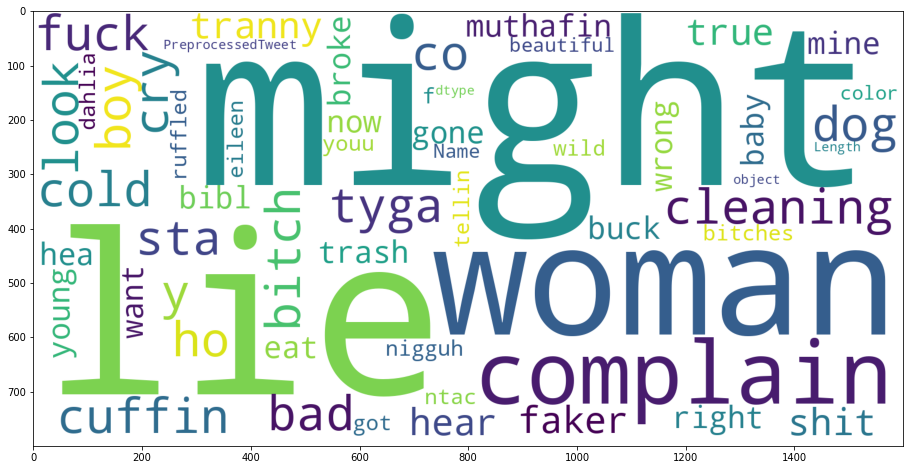

In [44]:
from wordcloud import WordCloud
word_c = WordCloud(collocations=False,background_color='white',mode='RGB',scale=4).generate(str(dataF['PreprocessedTweet']))
import matplotlib.pyplot as plt 
plt.figure(figsize=(18,8),facecolor='w')
plt.imshow(word_c);

In [45]:
def lemmatizing(words):
    lemmatizer =WordNetLemmatizer()
    return [lemmatizer.lemmatize(word) for word in words]

In [46]:
dataF['LemmaWords']=dataF['final_tweet_tokens'].apply(lambda x: lemmatizing(x))

In [47]:
dataF.head()

,count,hate_speech,offensive_language,neither,class,tweet,length,ExpandedSlangs,Preprocessed_Initial,PreprocessedTweet,final_tweet_tokens,LemmaWords
0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...,140,!!! RT @mayasolovely: As a woman you shouldn't...,"[!!!, RT, @mayasolovely:, As, a, woman, you, s...",woman you should not complain about cleaning y...,"[woman, you, should, not, complain, about, cle...","[woman, you, should, not, complain, about, cle..."
1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,85,!!!!! RT @mleew17: boy Thats cold...tyga Down ...,"[!!!!!, RT, @mleew17:, boy, That Is, cold...ty...",boy that cold tyga down bad for cuffin that ho...,"[boy, that, cold, tyga, down, bad, for, cuffin...","[boy, that, cold, tyga, down, bad, for, cuffin..."
2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,120,!!!!!!! RT @UrKindOfBrand Dog RT @80sbaby4life...,"[!!!!!!!, RT, @UrKindOfBrand, Dog, RT, @80sbab...",dog you ever fuck bitch and she sta cry you co...,"[dog, you, ever, fuck, bitch, and, she, sta, c...","[dog, you, ever, fuck, bitch, and, she, sta, c..."
3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,62,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,"[!!!!!!!!!, RT, @C_G_Anderson:, @viva_based, s...",she look like tranny,"[she, look, like, tranny]","[she, look, like, tranny]"
4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,137,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,"[!!!!!!!!!!!!!, RT, @ShenikaRoberts:, The, shi...",the shit you hear about might true might faker...,"[the, shit, you, hear, about, might, true, mig...","[the, shit, you, hear, about, might, true, mig..."


In [48]:
dataF['LemmaWords']

0        [woman, you, should, not, complain, about, cle...
1        [boy, that, cold, tyga, down, bad, for, cuffin...
2        [dog, you, ever, fuck, bitch, and, she, sta, c...
3                                [she, look, like, tranny]
4        [the, shit, you, hear, about, might, true, mig...
                               ...                        
24778    [you, muthafin, lie, right, his, trash, now, m...
24779    [you, have, gone, and, broke, the, wrong, hea,...
24780    [young, buck, want, eat, that, nigguh, like, a...
24781           [youu, got, wild, bitch, tellin, you, lie]
24782    [ruffled, ntac, eileen, dahlia, beautiful, col...
Name: LemmaWords, Length: 24783, dtype: object

In [49]:
# dataF.to_csv('Hate_spech_preprocessed.csv', index=False)

In [50]:
# !pip install keras

In [51]:
# !pip install tensorflow

In [52]:
# from keras.preprocessing.text import text_to_word_sequence

In [53]:
# dataF['KerasTokens']=dataF['PreprocessedTweet'].apply(text_to_word_sequence)

In [54]:
# dataF.head()

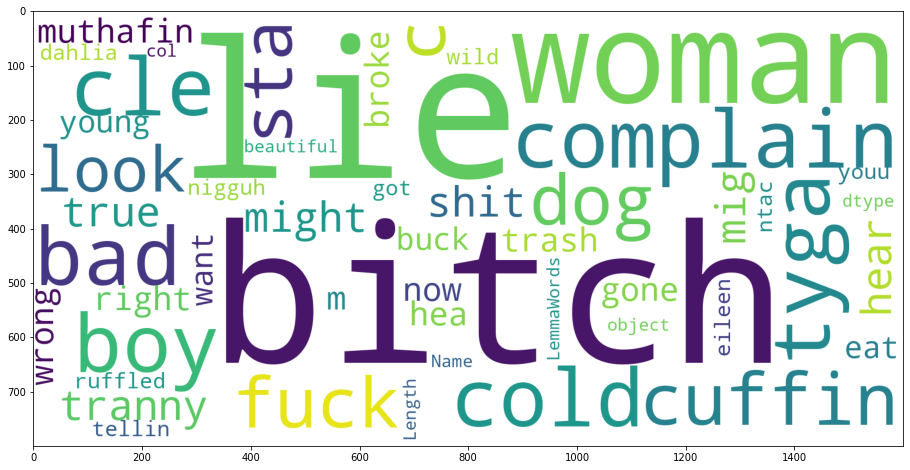

In [55]:
from wordcloud import WordCloud
word_c = WordCloud(collocations=False,background_color='white',mode='RGB',scale=4).generate(str(dataF['LemmaWords']))
import matplotlib.pyplot as plt 
plt.figure(figsize=(18,8),facecolor='w')
plt.imshow(word_c);

In [56]:
dataF['Lemma_Preprocessed']=dataF['LemmaWords'].map(lambda s:preprocess(s))

In [57]:
from sklearn.feature_extraction.text import CountVectorizer 

def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [58]:
common_words = get_top_n_words(dataF['Lemma_Preprocessed'], 250)
top_words=[]
for word, freq in common_words:
    print(word, freq)
    top_words.append(word)

bitch 11466
you 9282
the 7340
not 5041
that 4492
hoe 4347
and 3993
are 3063
like 2837
pussy 2265
all 2186
this 2165
for 2131
out 2054
nigga 2020
with 1854
got 1602
fuck 1575
get 1545
your 1544
they 1499
but 1489
just 1471
about 1406
she 1371
have 1337
when 1332
these 1323
shit 1300
trash 1165
her 1154
what 1085
laughing 1007
want 1002
loud 1000
will 964
amp 930
them 917
some 902
know 861
off 818
can 817
one 762
love 755
who 729
how 717
girl 701
cannot 675
would 641
fucking 631
because 625
bird 608
make 601
now 596
look 588
say 578
why 577
from 575
going 574
bad 573
man 568
then 554
faggot 545
his 543
good 538
need 533
too 522
think 499
time 496
hate 487
see 480
still 479
back 477
only 461
day 458
let 452
never 447
people 427
really 426
did 424
there 418
real 417
right 403
even 391
white 390
being 388
said 381
here 378
laugh 378
come 375
more 368
over 362
had 361
dick 360
call 357
their 351
head 348
wit 346
down 345
been 343
life 342
than 341
tell 340
stop 336
talk 331
take 328
damn 327

In [59]:
most_common = pd.DataFrame(common_words,columns=['words', 'count'])
most_common.head()

,words,count
0,bitch,11466
1,you,9282
2,the,7340
3,not,5041
4,that,4492


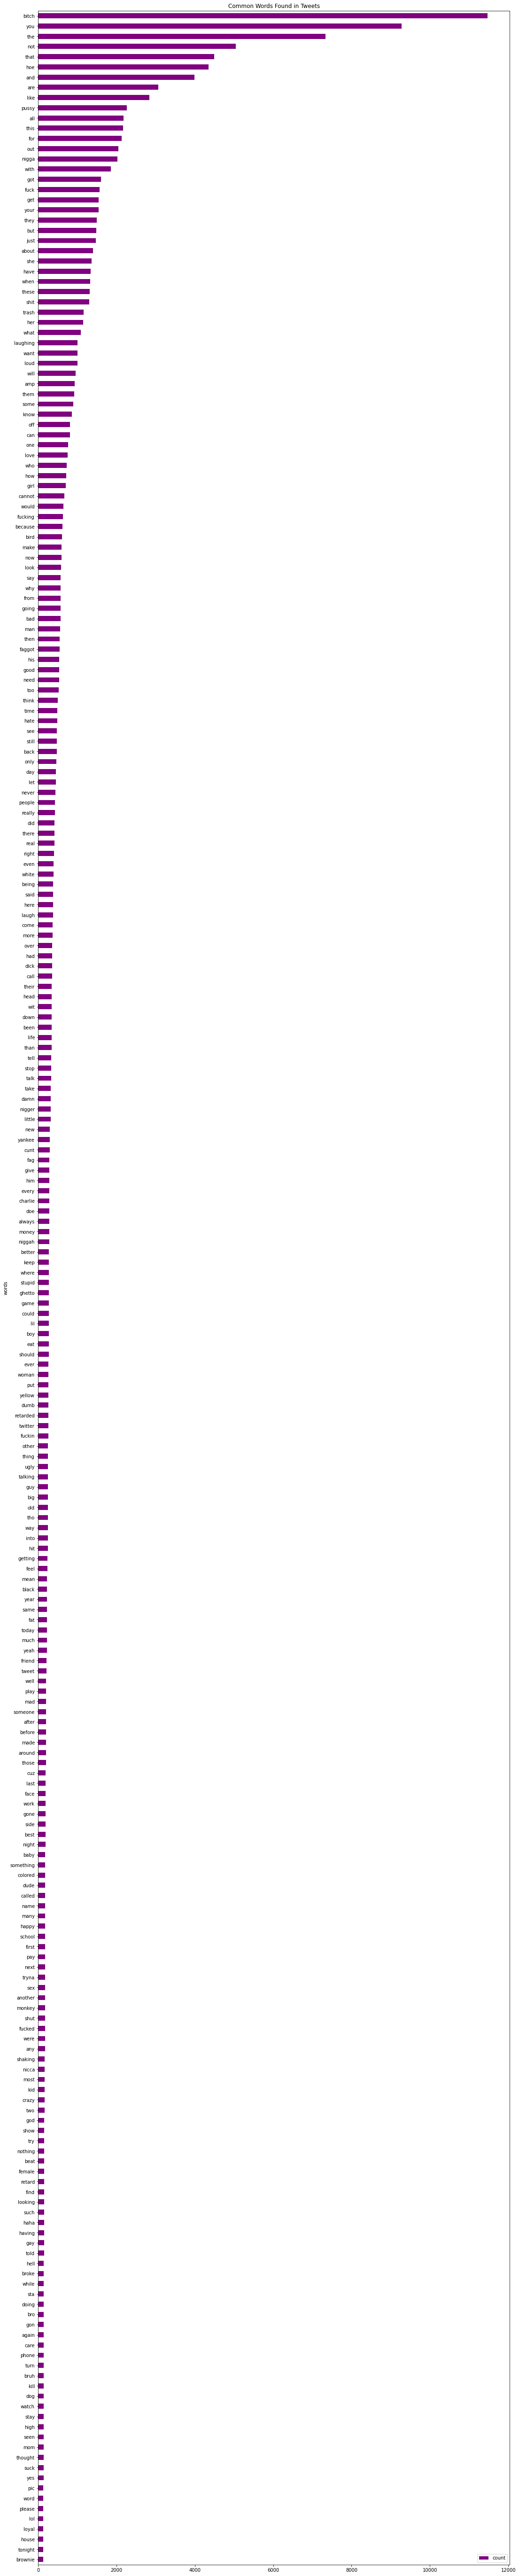

In [60]:
fig, ax = plt.subplots(figsize=(18, 100))

# Plot horizontal bar graph
most_common.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="purple")

ax.set_title("Common Words Found in Tweets")

plt.show()

# TF-IDF

In [61]:
# !pip install gensim

In [62]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer 
import gensim

In [63]:
tfidf_vectorizer = TfidfVectorizer(min_df=50, max_features=1000, stop_words=None,tokenizer=tokenize,analyzer='word')
tfidf = tfidf_vectorizer.fit_transform(dataF['PreprocessedTweet'])
tfidf.shape

(24783, 590)

In [64]:
tfidf_df = pd.DataFrame(tfidf.toarray())

In [210]:
# tfidf_df = pd.read_csv("/home/scipyuser/Akhil/TF-IDF.csv")

In [65]:
tfidf_df = tfidf_df.values

In [66]:
tfidf_df.shape

(24783, 590)

# Word2Vec

In [75]:
%%time

tokenized_tweet = dataF['Lemma_Preprocessed'].apply(lambda x: x.split()) # tokenizing 

model_w2v = gensim.models.Word2Vec(
            tokenized_tweet,
            vector_size=500, # desired no. of features/independent variables
            window=5, # context window size
            min_count=2, # Ignores all words with total frequency lower than 2.                                  
            sg = 1, # 1 for skip-gram model
            hs = 0,
            negative = 10, # for negative sampling
            workers= 32, # no.of cores
            seed = 34
) 

model_w2v.train(tokenized_tweet, total_examples= len(dataF['Lemma_Preprocessed']), epochs=20)

CPU times: user 3min 33s, sys: 1.06 s, total: 3min 34s
Wall time: 17 s


(3628394, 5058200)

In [76]:
def word_vector(tokens, size):
    vec = np.zeros(size).reshape((1, size))
    count = 0
    for word in tokens:
        try:
            vec += model_w2v.wv[word].reshape((1, size))
            count += 1.
        except KeyError:  # handling the case where the token is not in vocabulary
            continue
    if count != 0:
        vec /= count
    return vec

In [77]:
wordvec_arrays = np.zeros((len(tokenized_tweet), 500)) 
for i in range(len(tokenized_tweet)):
    wordvec_arrays[i,:] = word_vector(tokenized_tweet[i], 500 )
wordvec_df = pd.DataFrame(wordvec_arrays)
wordvec_df.shape

(24783, 500)

# Doc2Vec

In [78]:
#!pip install --upgrade pandas==0.25.0

In [79]:
!pip install tqdm

In [81]:
from tqdm import tqdm 
#tqdm.pandas(desc="progress-bar") 
from gensim.models.doc2vec import LabeledSentence
from gensim.models.doc2vec import TaggedDocument

ImportError: cannot import name 'LabeledSentence' from 'gensim.models.doc2vec' (/home/dstuser/anaconda3/lib/python3.7/site-packages/gensim/models/doc2vec.py)